In [1]:
from utils.datareader import DBpediaReader
from utils.datareader import CIFAR100Reader
from deepmf.deepmf import deepmf
from hiernmf2.hier8_neat import hier8_neat
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_reader = CIFAR100Reader()
image_reader.get_data_matrix()

## 1. Sample of some sub-categories

In [3]:
fine_label_list = image_reader.meta_dict[b'fine_label_names']
coarse_label_list = image_reader.meta_dict[b'coarse_label_names']
fine_label_list = [b.decode() for b in fine_label_list]
coarse_label_list = [b.decode() for b in coarse_label_list]

In [4]:
for i,coarse_label in enumerate(coarse_label_list):
    fine_labels = image_reader.label_sm.fine_labels[image_reader.label_sm.coarse_label == i]
    unique_fine_labels = list(fine_labels.unique())
    unique_fine_labels = [fine_label_list[u] for u in unique_fine_labels]
    print("{}. {}: [{}]".format(str(i),str(coarse_label), ', '.join(unique_fine_labels)))

0. aquatic_mammals: [beaver, dolphin, otter, seal, whale]
1. fish: [aquarium_fish, flatfish, ray, shark, trout]
2. flowers: [orchid, poppy, rose, sunflower, tulip]
3. food_containers: [bottle, bowl, can, cup, plate]
4. fruit_and_vegetables: [apple, mushroom, orange, pear, sweet_pepper]
5. household_electrical_devices: [clock, keyboard, lamp, telephone, television]
6. household_furniture: [bed, chair, couch, table, wardrobe]
7. insects: [bee, beetle, butterfly, caterpillar, cockroach]
8. large_carnivores: [bear, leopard, lion, tiger, wolf]
9. large_man-made_outdoor_things: [bridge, castle, house, road, skyscraper]
10. large_natural_outdoor_scenes: [cloud, forest, mountain, plain, sea]
11. large_omnivores_and_herbivores: [camel, cattle, chimpanzee, elephant, kangaroo]
12. medium_mammals: [fox, porcupine, possum, raccoon, skunk]
13. non-insect_invertebrates: [crab, lobster, snail, spider, worm]
14. people: [baby, boy, girl, man, woman]
15. reptiles: [crocodile, dinosaur, lizard, snake, tu

## 2. Visualize sample data

In [5]:
X=image_reader.X_lg.T*255
X = X.reshape(3000,3,32,32)
X = X.transpose(0,2,3,1).astype(np.uint8)

In [78]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

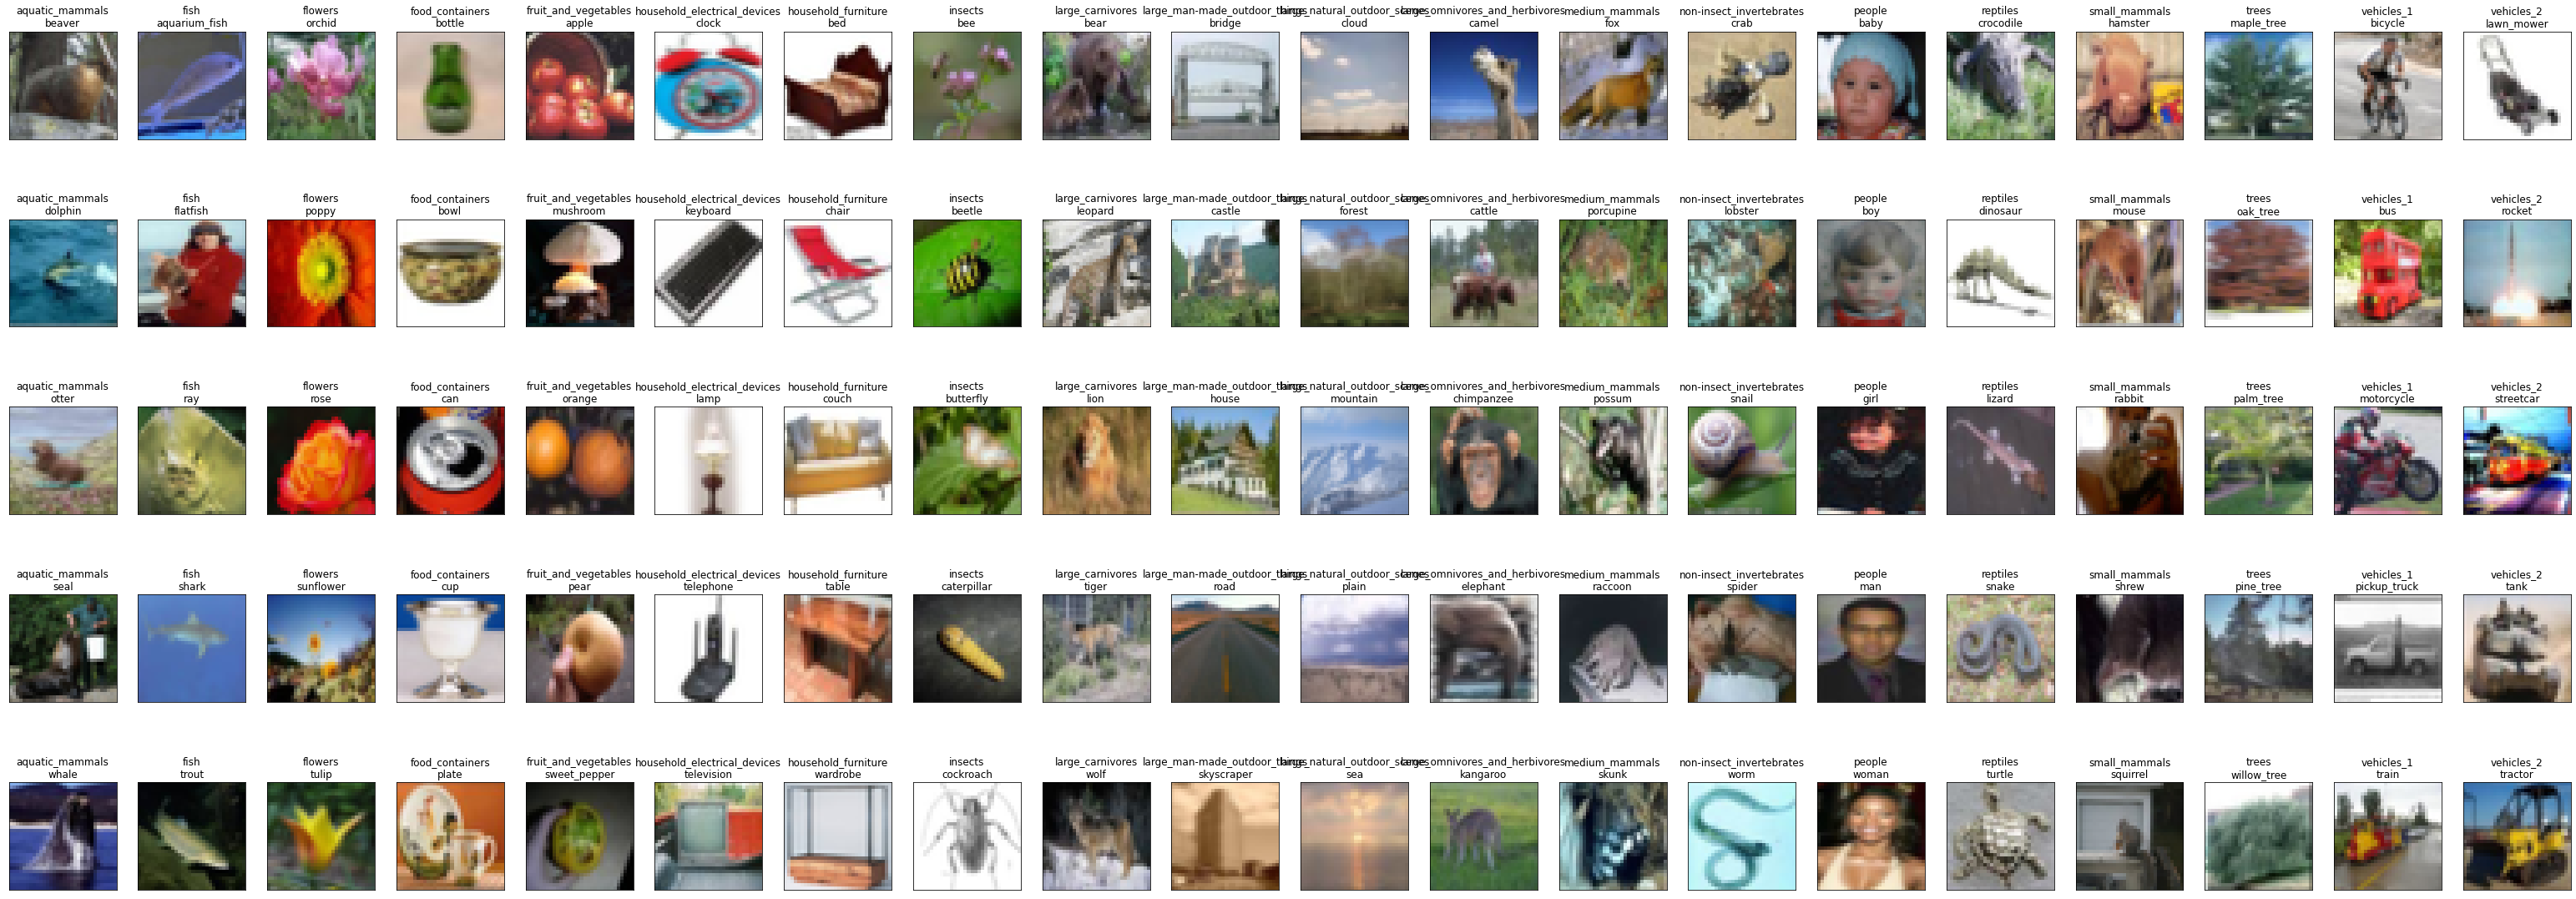

In [7]:
coarse_num = 20
fig=plt.figure(figsize=(55, 20))
for i in range(coarse_num):
    fine_labels = image_reader.label_lg.fine_labels[image_reader.label_lg.coarse_label == i]
    unique_fine_labels = list(fine_labels.unique())
    for j in range(5):
        fl = unique_fine_labels[j]
        sample_id = image_reader.label_lg[(image_reader.label_lg.coarse_label == i) & (image_reader.label_lg.fine_labels == fl)].sample(1).index[0]
        x = X[sample_id]
        fig.add_subplot(5, 20, 20*j+i+1)
        plt.imshow(x)
        plt.xticks([])
        plt.yticks([])
        plt.title("{}\n{}".format(coarse_label_list[i], fine_label_list[fl]))
plt.show()        


## 3. Run NMFs and deep MF  for the data

### 3.1. Run hierNMF2

In [96]:
Ws[:,is_leaf == 1].shape

(3072, 100)

In [97]:
leaf_ids = np.where(is_leaf == 1)

In [98]:
leaf_ids[0]

array([  2,   4,   5,   6,  18,  26,  33,  34,  35,  37,  38,  40,  42,
        44,  48,  49,  50,  51,  52,  55,  56,  57,  58,  59,  60,  62,
        64,  65,  66,  68,  71,  72,  73,  75,  76,  80,  81,  82,  86,
        87,  88,  89,  93,  97, 100, 102, 104, 105, 106, 109, 110, 111,
       115, 116, 117, 118, 119, 121, 130, 132, 133, 134, 135, 136, 139,
       140, 141, 146, 148, 149, 153, 155, 157, 158, 159, 160, 161, 162,
       163, 165, 166, 168, 169, 170, 171, 172, 173, 174, 177, 182, 184,
       187, 188, 189, 190, 191, 192, 195, 196, 197])

In [8]:
k=100
tree, splits, is_leaf, clusters, timings, Ws, priorities = hier8_neat(image_reader.X_sm, k)

0.8110274394779144
0.8147742787296144
0.7972946687210946
0.8088978984963939
0.866955147307149
0.8721933519849859
0.8692892768922056
0.8887268118948068
0.8836455474628647
0.8340565400389597
0.8401276205820688
0.8385381625984216
0.8338485454196789
0.8759406301949535
0.8293238663603844
0.8475973678127026
0.8364631581752361
0.8296565340519392
0.8509623780645514
0.8493673604819129
0.828901772897485
0.8269663503759673
0.84887200519557
0.8261651253537368
0.8297966528829822
0.8247105783159923
0.8462262547358679
0.8458038533310457
0.8836189695615193
0.8284413932231062
0.8225368762546924
0.8640450757390014
0.8221614462815435
0.8148607118663114
0.8284387162543316
0.8520746976210735
0.8268386785210129
0.8713034892840311
0.8183852307539715
0.8122814038094027
0.8711331364588607
0.8753708355434517
0.8096101810499322
0.8085487804779029
0.8395564113356304
0.8204380925755034
0.804356883539793
0.8463154070797297
0.8010409283511019
0.8004086757417559
0.7975434264379118
0.7917107618599162
0.788353183393716

ValueError: too many values to unpack (expected 7)